In [2]:
#Libraries
import pandas as pd
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average Temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average Feeling Temperature recorded for the hour ( in degree Celsius)
`humidity`| Average Humidity recorded for the hour (in %)
`windspeed`| Average Wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
# Dimensions of training data
data.shape

(8708, 11)

In [5]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [6]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [7]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [8]:
# Check Datatypes
data.dtypes

id              int64
timestamp      object
season         object
holiday        object
workingday     object
weather        object
temp          float64
temp_feel     float64
humidity      float64
windspeed     float64
demand        float64
dtype: object

In [9]:
# check columns with data type object
col_list = [c for c in data.columns if data[c].dtype == 'object' and c != 'timestamp']
print(col_list)

['season', 'holiday', 'workingday', 'weather']


In [10]:
# make a copy of training data for data preprocessing
train_data = data.copy()

In [11]:
# converting string timestamp to datetime and features
train_data['timestamp'] = pd.to_datetime(data['timestamp'])
train_data['day'] = train_data['timestamp'].dt.day
train_data['hour'] = train_data['timestamp'].dt.hour
train_data['weekday'] = train_data['timestamp'].dt.weekday
train_data['month'] = train_data['timestamp'].dt.month
train_data['year'] = train_data['timestamp'].dt.year
train_data.shape

(8708, 16)

In [12]:
# drop columns timestamp as we have generated hour, day, weekday, month and year features from it.
train_data = train_data.drop(columns=['timestamp'])

In [13]:
# encode values in season column
c = 'season'
for i, item in enumerate(train_data[c].unique().tolist()):
    train_data.loc[train_data[c] == item, c] = i+1

print("Actual values:", data[c].unique().tolist())
print("Encoded values:", train_data[c].unique().tolist())

Actual values: ['spring', 'summer', 'fall', 'winter']
Encoded values: [1, 2, 3, 4]


In [14]:
# encode values in holiday column
c = 'holiday'
for i, item in enumerate(train_data[c].unique().tolist()):
    train_data.loc[train_data[c] == item, c] = i

print("Actual values:", data[c].unique().tolist())
print("Encoded values:", train_data[c].unique().tolist())

Actual values: ['No', 'Yes']
Encoded values: [0, 1]


In [15]:
# encode values in workingday column
c = 'workingday'
for i, item in enumerate(train_data[c].unique().tolist()):
    train_data.loc[train_data[c] == item, c] = i

print("Actual values:", data[c].unique().tolist())
print("Encoded values:", train_data[c].unique().tolist())

Actual values: ['No', 'Yes']
Encoded values: [0, 1]


In [16]:
# encode values in weather column
c = 'weather'
for i, item in enumerate(train_data[c].unique().tolist()):
    train_data.loc[train_data[c] == item, c] = i+1

print("Actual values:", data[c].unique().tolist())
print("Encoded values:", train_data[c].unique().tolist())

Actual values: ['Clear or partly cloudy', 'Mist', 'Light snow or rain', 'heavy rain/ice pellets/snow + fog']
Encoded values: [1, 2, 3, 4]


In [17]:
# Confirm data type changes
train_data.dtypes

id              int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
temp_feel     float64
humidity      float64
windspeed     float64
demand        float64
day             int64
hour            int64
weekday         int64
month           int64
year            int64
dtype: object

In [18]:
# Check for any null or missing values
train_data.isnull().values.any()

True

In [19]:
# Check missing values in each column of training data
train_data.isnull().sum()

id               0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
day              0
hour             0
weekday          0
month            0
year             0
dtype: int64

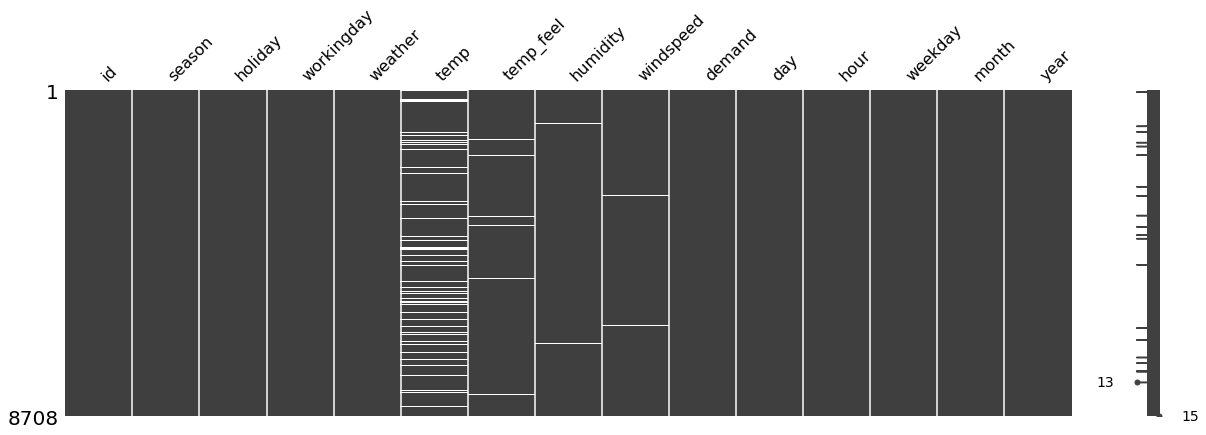

In [20]:
# Visualize missing values.
mno.matrix(train_data, figsize = (20, 6))

In [21]:
# impute missing values in temp_feel, humidity and windspeed with median value
cols = ['temp_feel', 'humidity', 'windspeed']
for c in cols:
    train_data.loc[train_data[c].isnull(), c] = train_data.loc[train_data[c].notnull(), c].median()

In [22]:
# impute values in temp columns with regression
cols = [c for c in train_data.columns if c not in ['id', 'temp']]
y = train_data.loc[train_data['temp'].notnull(), 'temp']
X = train_data.loc[train_data['temp'].notnull(), cols]
model = LinearRegression()
model.fit(X, y)
train_data.loc[train_data['temp'].isnull(), 'temp'] = model.predict(train_data.loc[train_data['temp'].isnull(), cols])

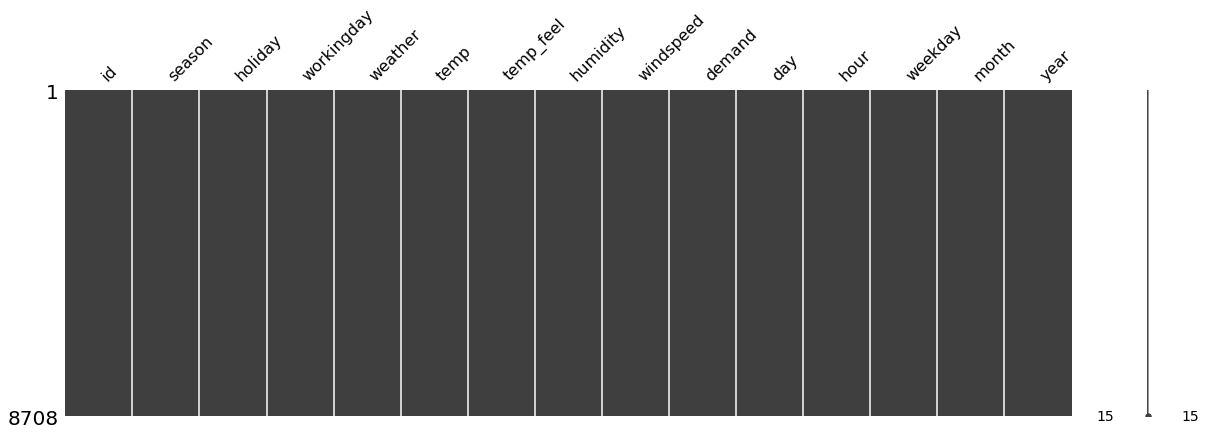

In [23]:
# Confirm that all missing values are gone.
mno.matrix(train_data, figsize = (20, 6))

In [24]:
# count total points for which windspeed = 0
print("Impute", train_data[train_data['windspeed'] == 0].shape[0], "rows in windspeed column for which value = 0")

# use regression to impute these values
data_wind_zero = train_data[train_data['windspeed'] == 0]
data_wind_not_zero = train_data[train_data['windspeed'] != 0]
rf_model = RandomForestRegressor()
cols = ["season","weather","humidity", "temp", "temp_feel", "month","year"]
rf_model.fit(data_wind_not_zero[cols], data_wind_not_zero['windspeed'])
vals = rf_model.predict(data_wind_zero[cols])
data_wind_zero['windspeed'] = vals
train_data = data_wind_not_zero.append(data_wind_zero)
train_data.reset_index(inplace=True)
train_data.drop('index',inplace=True,axis=1)

Impute 997 rows in windspeed column for which value = 0


In [25]:
# print a few rows of train data
train_data.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,day,hour,weekday,month,year
0,6,1,0,0,2,9.84,12.880,75.0,6.0032,0.000000,1,5,6,1,2017
1,11,1,0,0,1,15.58,19.695,76.0,16.9979,3.583519,1,10,6,1,2017
2,12,1,0,0,1,14.76,16.665,81.0,19.0012,4.025352,1,11,6,1,2017
3,13,1,0,0,1,17.22,21.210,77.0,19.0012,4.430817,1,12,6,1,2017
4,14,1,0,0,2,18.86,22.725,72.0,19.9995,4.543295,1,13,6,1,2017


## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [26]:
#Loading Test data
test = pd.read_csv('test.csv')
test.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [27]:
# make a copy of test data for data preprocessing
test_data = test.copy()

In [28]:
# converting string timestamp to datetime and generate features
test_data['timestamp'] = pd.to_datetime(test['timestamp'])
test_data['day'] = test_data['timestamp'].dt.day
test_data['hour'] = test_data['timestamp'].dt.hour
test_data['weekday'] = test_data['timestamp'].dt.weekday
test_data['month'] = test_data['timestamp'].dt.month
test_data['year'] = test_data['timestamp'].dt.year
test_data.shape

(1792, 15)

In [29]:
# dropping timestamp columns from test data
test_data = test_data.drop(columns=['timestamp'])

In [30]:
# encode values in season column
c = 'season'
for i, season in enumerate(test_data[c].unique().tolist()):
    test_data.loc[test_data[c] == season, c] = i+1

print("Actual values:", test[c].unique().tolist())
print("Encoded values:", test_data[c].unique().tolist())

Actual values: ['fall', 'winter']
Encoded values: [1, 2]


In [31]:
# encode values in holiday column
c = 'holiday'
for i, item in enumerate(test_data[c].unique().tolist()):
    test_data.loc[test_data[c] == item, c] = i

print("Actual values:", test[c].unique().tolist())
print("Encoded values:", test_data[c].unique().tolist())

Actual values: ['No', 'Yes']
Encoded values: [0, 1]


In [32]:
# encode values in workingday column
c = 'workingday'
for i, item in enumerate(test_data[c].unique().tolist()):
    test_data.loc[test_data[c] == item, c] = i

print("Actual values:", test[c].unique().tolist())
print("Encoded values:", test_data[c].unique().tolist())

Actual values: ['No', 'Yes']
Encoded values: [0, 1]


In [33]:
# encode values in weather column
c = 'weather'
for i, item in enumerate(test_data[c].unique().tolist()):
    test_data.loc[test_data[c] == item, c] = i+1

print("Actual values:", test[c].unique().tolist())
print("Encoded values:", test_data[c].unique().tolist())

Actual values: ['Clear or partly cloudy', 'Light snow or rain', 'Mist']
Encoded values: [1, 2, 3]


In [34]:
# check if test data has any missing values
test_data.isnull().values.any()

False

In [35]:
# count total points for which windspeed = 0
print(test_data[test_data['windspeed'] == 0].shape[0])

# use regression to impute these values
data_wind_zero = test_data[test_data['windspeed'] == 0]
data_wind_not_zero = test_data[test_data['windspeed'] != 0]
rf_model = RandomForestRegressor()
cols = ["season","weather","humidity", "temp", "temp_feel", "month","year"]
rf_model.fit(data_wind_not_zero[cols], data_wind_not_zero['windspeed'])
vals = rf_model.predict(data_wind_zero[cols])
data_wind_zero['windspeed'] = vals
test_data = data_wind_not_zero.append(data_wind_zero)
test_data.reset_index(inplace=True)
test_data.drop('index',inplace=True,axis=1)

242


In [36]:
# print a couple of rows of test data
test_data.head()

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,day,hour,weekday,month,year
0,8709,1,0,0,1,29.52,34.850,74.0,16.9979,5,5,6,8,2018
1,8710,1,0,0,1,29.52,34.850,79.0,16.9979,5,6,6,8,2018
2,8712,1,0,0,1,31.16,36.365,66.0,22.0028,5,8,6,8,2018
3,8713,1,0,0,1,32.80,38.635,59.0,23.9994,5,9,6,8,2018
4,8714,1,0,0,1,32.80,38.635,59.0,27.9993,5,10,6,8,2018


### Visualizations

`The joint plots below show the relationship between continous variables: temp, temp_feel, humidity and windspeed. Temp and temp_feel seem to have a direct relationship with demand. When temp increases, demand also increases whereas humidity has an inverse relationship i.e. when humidity increases, demand decreases.` 

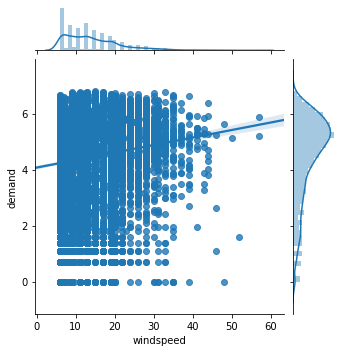

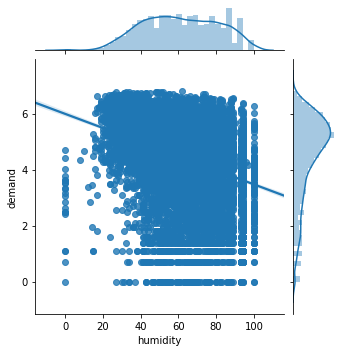

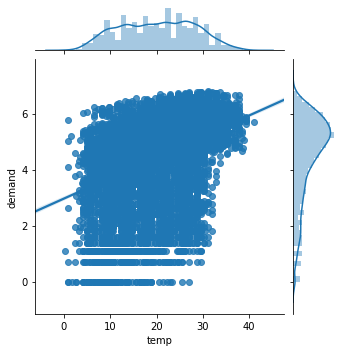

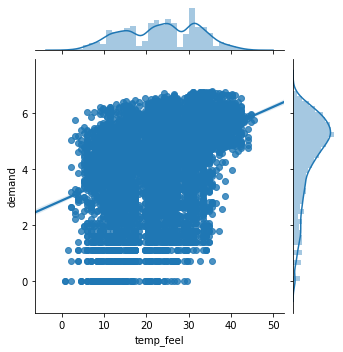

In [37]:
# joint plots for numeric variables
cols = ["windspeed", "humidity", "temp", "temp_feel"]
for c in cols:
    sns.jointplot(x=c, y="demand", data=train_data, kind = 'reg', height = 5)
plt.show()

`The bar plots show the relationship between discrete variables: season, holiday, weather, hour, day and month with demand. We can see the following trends:`

1. Demand is low in spring season (0) and increases in summer, fall and winter. See first plot.
2. Demand is slightly less on holidays as compared to when it's not a holiday other days. See second plot.
3. Demand is highest when weather is clear or partly cloudy(0) and it decreases as weather conditions worsen (rain, snow, etc). See third plot.
4. Demand is high at morning (8 am) and evening time (5 to 6 pm). See fourth plot.
5. Can't see a clear trend for any given day of week.  See fifth plot.
6. Demand is low at the start of the year and eventually increases. Bike rental demand is very high in summer months.

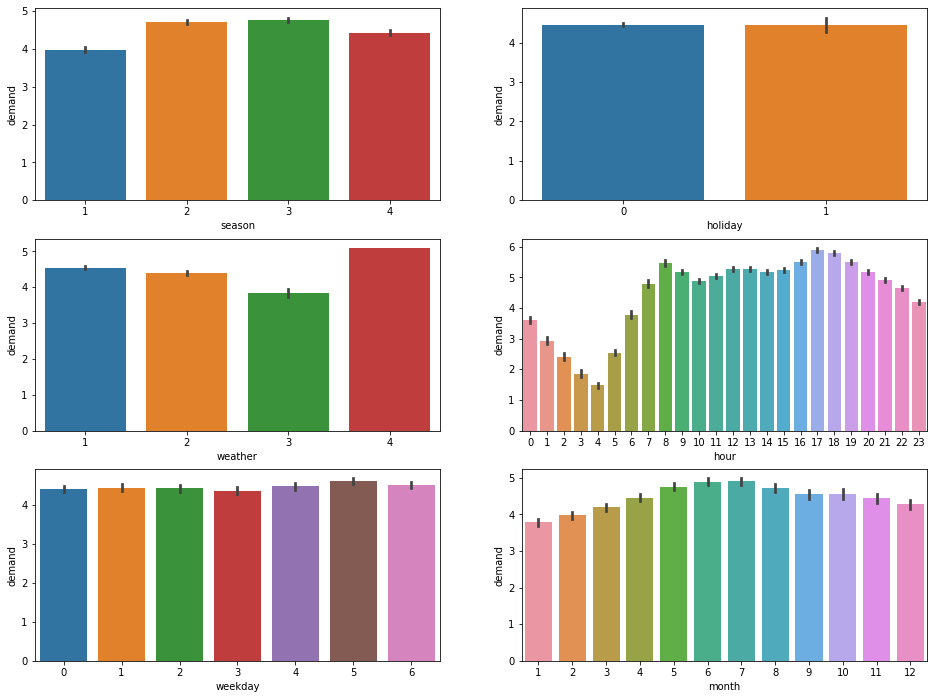

In [38]:
# bar plots for categorical features
cols = ['season', 'holiday', 'weather', 'hour', 'weekday', 'month']
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, c in enumerate(cols):
    ax = axes.ravel()[i]
    sns.barplot(x=c, y="demand", ax=ax, data=train_data)

`The plots below represent the distribution of target variable: demand. It has a left skewed distribution.` 

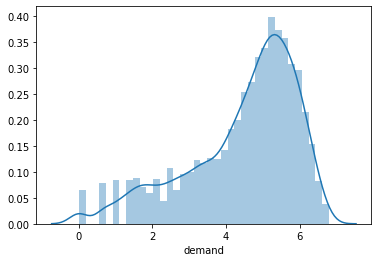

In [39]:
# plot distribution of demand variables
sns.distplot(train_data['demand'])
plt.show()

`The box plots below are drawn for time related features: hour, day, month, season. The hour vs. demand plot shows the variance in demand with respect to hours of day. We can see that 7am, 8am and 17, 18, 19 (5, 6, 7 pm) have highest variance(simply put: demand is more). Similar trend can be seen for month vs. demand plot where variance is high for months 5 to 11 (June to December). The plots also show that there are quite a few outliers which can affect the performance of our model and should be dealt with.`

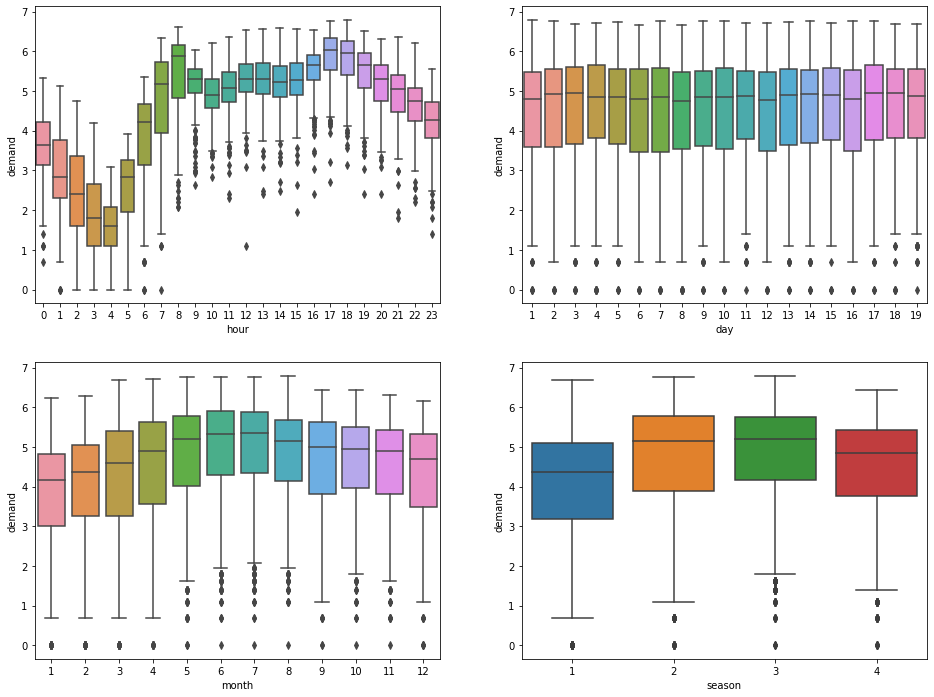

In [40]:
# plot box plots to see outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
cols = ['hour', 'day', 'month', 'season']
for i, c in enumerate(cols):
    ax = axes.ravel()[i]
    sns.boxplot(x=c, y='demand', ax=ax, data=train_data)

In [41]:
# removing outliers from train data
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

train_data =train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

`The correlation plot below shows the correlation between variables. We can see that season is correlated with month and year. Temp is highly correlated with temp_feel.`

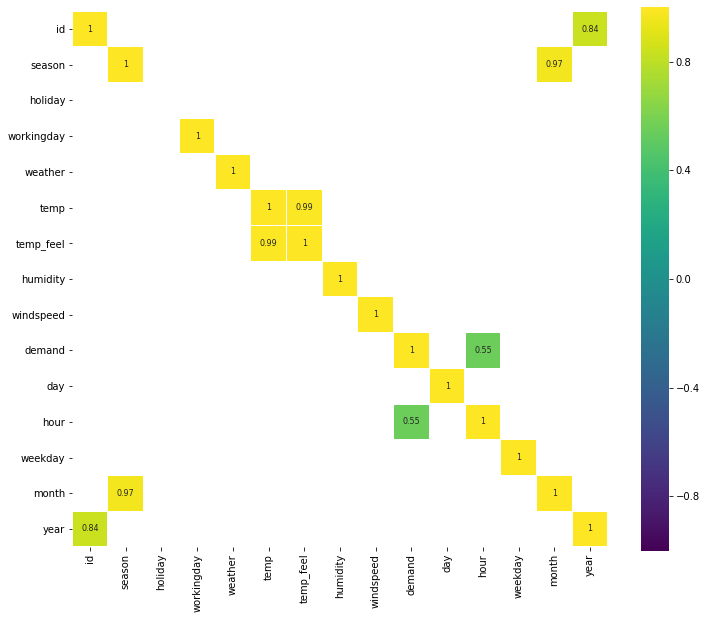

In [42]:
# Correlation heatmap
corr = train_data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)



**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [43]:
columns = ['temp', 'temp_feel', 'humidity', 'windspeed']
scalar = StandardScaler()
scalar.fit(train_data[columns])
train_data[columns] = scalar.transform(train_data[columns])

In [44]:
y = train_data['demand']
X = train_data.drop(columns=['demand', 'id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (6495, 13)
Validation Set Dimensions: (1624, 13)


In [45]:
# train random forest regression model
randomf = RandomForestRegressor(n_estimators=1000, max_depth=8)
randomf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
# print MAE score for tran and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 0.2689460263298527
Mean Absolute Error for Validation Set: 0.31460820694394837


feature: season = 0.003903761611789702
feature: holiday = 0.0
feature: workingday = 0.04854465543022179
feature: weather = 0.009916024414859283
feature: temp = 0.08261335056079072
feature: temp_feel = 0.012891701672791826
feature: humidity = 0.021667756506347943
feature: windspeed = 0.002746065639465219
feature: day = 0.0033183770524740316
feature: hour = 0.7691548231316904
feature: weekday = 0.005721992849055188
feature: month = 0.017406377077767675
feature: year = 0.022115114052746247


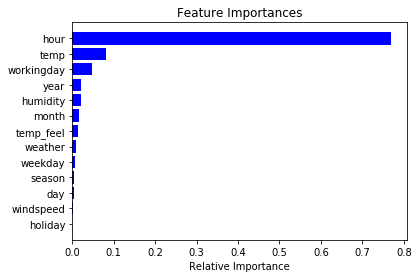

In [47]:
# important features for random forest regression
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
# Train XGBoost Regression
xgbr = XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=4)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [49]:
# print MAE score for tran and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, xgbr.predict(X_train)))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, xgbr.predict(X_test)))

Mean Absolute Error for Training Set: 0.14383428459933906
Mean Absolute Error for Validation Set: 0.1944593292558618


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

### Train model with training and validation sets combined and make predictions on test set

In [50]:
# store ids and drop column
ids = test_data['id']
test_data = test_data.drop(columns=['id'])

In [51]:
# make predictions on test data
prediction = randomf.predict(test_data)

In [53]:
# Create a dataframe of ids and demand predictions
df = pd.DataFrame({'id':ids, 'demand': prediction})

# Submission
df.to_csv('submissions.csv',index=False)

---